In [1]:
import pyarrow.parquet as pa
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
table = pa.read_table('metadata_en.parquet')
df = table.to_pandas()

In [3]:
df.reset_index(inplace=True)

In [4]:
df.head()

,index,title,creator,birthdate,deathdate,publisher,issued,rights,language,subjects,description,Index
0,1,The Master Spirit,"Magnay, William, Sir",1855,1917,Project Gutenberg,2022-03-25,Public domain in the USA.,en,"[London (England) -- Fiction, Love stories, Ad...",[Reading ease score: 71.3 (7th grade). Fairly ...,67703
1,2,The Family on Wheels,"Oxley, J. Macdonald (James Macdonald)",1855,1907,Project Gutenberg,2017-11-05,Public domain in the USA.,en,"[Orphans -- Juvenile fiction, Siblings -- Juve...",[Reading ease score: 77.9 (7th grade). Fairly ...,55891
2,3,Three Good Giants\nWhose Ancient Deeds are rec...,"Rabelais, François",1835,1901,Project Gutenberg,2019-04-09,Public domain in the USA.,en,"[Fantasy fiction, Conduct of life -- Juvenile ...",[Reading ease score: 76.2 (7th grade). Fairly ...,59235
3,4,Drake's Road Book of the Grand Junction Railwa...,"Drake, James, active 1825",None,None,Project Gutenberg,2013-07-31,Public domain in the USA.,en,[Grand Junction Railway Company (Great Britain...,[Reading ease score: 65.5 (8th & 9th grade). N...,43367
4,5,Facts and Speculations on the Origin and Histo...,"Chatto, William Andrew",1799,1864,Project Gutenberg,2014-05-04,Public domain in the USA.,en,"[Playing cards -- History, GV]",[Reading ease score: 62.7 (8th & 9th grade). N...,45584


In [5]:
df['subjects']

0        [London (England) -- Fiction, Love stories, Ad...
1        [Orphans -- Juvenile fiction, Siblings -- Juve...
2        [Fantasy fiction, Conduct of life -- Juvenile ...
3        [Grand Junction Railway Company (Great Britain...
4                           [Playing cards -- History, GV]
                               ...                        
59847       [United States -- Politics and government, PS]
59848                 [Iceboating -- Juvenile fiction, PZ]
59849    [Clergy -- Fiction, Villages -- Fiction, Scotl...
59850    [Great Britain -- History -- Tudors, 1485-1603...
59851    [Humorous poetry, American, Sonnets, Street-ra...
Name: subjects, Length: 59852, dtype: object

In [6]:
df['description'][162]

array(['Reading ease score: 56.6 (10th to 12th grade). Somewhat difficult to read.'],
      dtype=object)

In [7]:
tags_dict = {}

In [8]:
for i in range(len(df)):
  for j in range(len(df['subjects'][i])):
    splitted_tags = df['subjects'][i][j].split(' -- ')
    # print(splitted_tags)
    for tag in splitted_tags:
      if tag in tags_dict.keys():
        if df['Index'][i] not in tags_dict[tag]:
          tags_dict[tag].append(df['Index'][i])
      else:
        tags_dict[tag] = [df['Index'][i]]

In [9]:
tags_dict.keys()

dict_keys(['London (England)', 'Fiction', 'Love stories', 'Adventure stories', 'Trials (Murder)', 'Lawyers', 'Countesses', 'PR', 'Orphans', 'Juvenile fiction', 'Siblings', 'Circus performers', 'Children', 'Circus animals', 'PZ', 'Fantasy fiction', 'Conduct of life', 'Islands', 'Death', 'Giants', 'Kings and rulers', 'Clergy', 'War', 'Tailors', 'Grand Junction Railway Company (Great Britain)', 'Guidebooks', 'Railroad travel', 'Great Britain', 'DA', 'HE', 'Playing cards', 'History', 'GV', 'English wit and humor', 'Periodicals', 'AP', 'English poetry', 'Patriotic poetry, English', 'Cooking, American', 'TX', 'Short stories, American', 'New England', 'Social life and customs', 'Historical fiction, American', 'PS', 'Dogs', 'Training', 'SF', 'Canals', 'England', 'Railroads', 'Railroads, Atmospheric', 'TF', 'Hadrian, Emperor of Rome, 76-138', 'Egypt', '30 B.C.-640 A.D.', 'German fiction', 'Translations into English', 'PT', "Children's literature", 'Science fiction', 'Time travel', 'Extraterrest

In [10]:
data = pd.DataFrame({
    "Key": list(tags_dict.keys()),
    "Value": [values for values in tags_dict.values()]
})

In [11]:
data

,Key,Value
0,London (England),"[67703, 55244, 34812, 46403, 47098, 20575, 435..."
1,Fiction,"[67703, 513, 5490, 24395, 66465, 9738, 15817, ..."
2,Love stories,"[67703, 15817, 46403, 12442, 70002, 55719, 455..."
3,Adventure stories,"[67703, 67899, 72700, 62186, 23662, 63523, 439..."
4,Trials (Murder),"[67703, 60538, 33207, 56015, 73110, 63018, 694..."
...,...,...
18610,"White, Stewart Edward, 1873-1946",[49239]
18611,"Martin Luther King, Jr., Day",[206]
18612,Monastic libraries,[21630]
18613,Military police,[55965]


In [12]:
filtered_data = data[data['Value'].apply(lambda x: len(x) > 4)].reset_index(drop=True)

In [13]:
filtered_data

,Key,Value
0,London (England),"[67703, 55244, 34812, 46403, 47098, 20575, 435..."
1,Fiction,"[67703, 513, 5490, 24395, 66465, 9738, 15817, ..."
2,Love stories,"[67703, 15817, 46403, 12442, 70002, 55719, 455..."
3,Adventure stories,"[67703, 67899, 72700, 62186, 23662, 63523, 439..."
4,Trials (Murder),"[67703, 60538, 33207, 56015, 73110, 63018, 694..."
...,...,...
4224,"Arnold, Benedict, 1741-1801","[27670, 49585, 69849, 62181, 49500]"
4225,Halifax (N.S.),"[33754, 38666, 53135, 25358, 37580, 53697]"
4226,Turtles,"[33373, 20716, 32817, 22434, 31621]"
4227,Amnesia,"[63919, 40831, 54971, 37189, 62476, 70089]"


In [14]:
LLC_dict = {'A': 'General Works',
            'B': 'Philosophy. Psychology. Religion',
            'C': 'Auxiliary Sciences Of History',
            'D': 'World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc.',
            'E': 'History Of The Americas',
            'F': 'History Of The Americas',
            'G': 'Geography. Anthropology. Recreation',
            'H': 'Social Sciences',
            'J': 'Political Science',
            'K': 'Law',
            'L': 'Education',
            'M': 'Music',
            'N': 'Fine Arts',
            'P': 'Language And Literature',
            'Q': 'Science',
            'R': 'Medicine',
            'S': 'Agriculture',
            'T': 'Technology',
            'U': 'Military Science',
            'V': 'Naval Science',
            'Z': 'Bibliography. Library Science. Information Resources (General)',
            }

In [15]:
def subject_converter(subject: str) -> str:
    if len(subject) <= 3 and subject.isupper():
        return LLC_dict[subject[0:1]]
    return subject

In [16]:
filtered_data['Key'] = filtered_data['Key'].apply(subject_converter)

In [17]:
filtered_data

,Key,Value
0,London (England),"[67703, 55244, 34812, 46403, 47098, 20575, 435..."
1,Fiction,"[67703, 513, 5490, 24395, 66465, 9738, 15817, ..."
2,Love stories,"[67703, 15817, 46403, 12442, 70002, 55719, 455..."
3,Adventure stories,"[67703, 67899, 72700, 62186, 23662, 63523, 439..."
4,Trials (Murder),"[67703, 60538, 33207, 56015, 73110, 63018, 694..."
...,...,...
4224,"Arnold, Benedict, 1741-1801","[27670, 49585, 69849, 62181, 49500]"
4225,Halifax (N.S.),"[33754, 38666, 53135, 25358, 37580, 53697]"
4226,Turtles,"[33373, 20716, 32817, 22434, 31621]"
4227,Amnesia,"[63919, 40831, 54971, 37189, 62476, 70089]"


In [18]:
filtered_data = filtered_data.groupby('Key').agg({
    'Value': lambda x: list(set([item for sublist in x for item in sublist])),
}).reset_index()

filtered_data['Book_Count'] = filtered_data['Value'].apply(len)
filtered_data = filtered_data.sort_values('Book_Count', ascending=False).reset_index(drop=True)


In [19]:
filtered_data

,Key,Value,Book_Count
0,Language And Literature,"[71159, 64609, 10750, 36258, 47962, 15169, 463...",32438
1,Fiction,"[52957, 51752, 9425, 34190, 42092, 20728, 2067...",14956
2,History,"[52957, 44889, 1103, 4133, 62630, 57793, 46670...",6625
3,Juvenile fiction,"[37207, 64609, 39374, 15169, 46313, 6908, 4903...",5420
4,"World History And History Of Europe, Asia, Afr...","[62630, 4133, 57308, 35710, 42990, 46670, 5880...",5113
...,...,...,...
4055,Technological innovations,"[8978, 63942, 775, 66409, 12163]",5
4056,"Manuscripts, Medieval","[19415, 43255, 21630, 1615, 626]",5
4057,Teddy bears,"[73011, 51199, 67098, 53240, 17064]",5
4058,Culture conflict,"[177, 2948, 12280, 60627, 70128]",5


### Ma trận tương quan thể hiện số lượng sách chung thuộc về cả 2 tag

#### Các cặp tag có mối tương quan lớn

In [20]:
top_200_filtered_data = filtered_data.head(200)
keys = top_200_filtered_data['Key'].tolist()
correlation_matrix = pd.DataFrame(index=keys, columns=keys)

for key1 in keys:
    for key2 in keys:
        set1 = set(filtered_data[filtered_data['Key']==key1]['Value'].iloc[0])
        set2 = set(filtered_data[filtered_data['Key']==key2]['Value'].iloc[0])
        correlation = len(set1.intersection(set2))
        correlation_matrix.loc[key1, key2] = correlation

In [21]:
correlation_matrix.head(200)

,Language And Literature,Fiction,History,Juvenile fiction,"World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc.",Philosophy. Psychology. Religion,United States,Periodicals,Science fiction,19th century,...,Mars (Planet),Pirates,"Colonial period, ca. 1600-1775",Greece,Catholic Church,Sermons,Time travel,F001,Criminals,Art
Language And Literature,32438,14942,2213,5413,126,97,1114,304,3096,2340,...,159,135,71,56,16,10,158,4,102,29
Fiction,14942,14956,1465,61,8,7,748,3,2241,924,...,157,64,48,17,11,0,155,0,96,12
History,2213,1465,6625,366,1828,224,1310,54,2,461,...,0,21,163,65,15,9,3,69,10,22
Juvenile fiction,5413,61,366,5420,0,3,187,1,22,72,...,2,66,14,3,1,0,3,0,4,0
"World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc.",126,8,1828,0,5113,25,30,119,0,192,...,0,4,0,79,8,5,0,0,2,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sermons,10,0,9,0,5,142,5,2,0,63,...,0,0,1,0,9,158,0,0,0,0
Time travel,158,155,3,3,0,0,4,0,138,0,...,1,0,0,0,0,0,158,0,1,0
F001,4,0,69,0,0,1,6,1,0,3,...,0,0,25,0,0,0,0,158,0,0
Criminals,102,96,10,4,2,1,8,0,35,5,...,6,0,0,0,0,0,1,0,158,0


Tỉ lệ được hiểu là tỉ lệ số lượng sách chung của 2 tag (row, col) trên số lượng sách của tag row (row, row)

In [22]:
percentage_correlation_matrix = (correlation_matrix.div(correlation_matrix.max(axis=1), axis=0) * 100)
percentage_correlation_matrix

,Language And Literature,Fiction,History,Juvenile fiction,"World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc.",Philosophy. Psychology. Religion,United States,Periodicals,Science fiction,19th century,...,Mars (Planet),Pirates,"Colonial period, ca. 1600-1775",Greece,Catholic Church,Sermons,Time travel,F001,Criminals,Art
Language And Literature,100.0,46.063259,6.822246,16.687219,0.388433,0.299032,3.434244,0.937172,9.544362,7.213762,...,0.490166,0.416179,0.218879,0.172637,0.049325,0.030828,0.487083,0.012331,0.314446,0.089401
Fiction,99.906392,100.0,9.7954,0.407863,0.05349,0.046804,5.001337,0.020059,14.983953,6.178122,...,1.049746,0.427922,0.320941,0.113667,0.073549,0.0,1.036373,0.0,0.641883,0.080235
History,33.403774,22.113208,100.0,5.524528,27.592453,3.381132,19.773585,0.815094,0.030189,6.958491,...,0.0,0.316981,2.460377,0.981132,0.226415,0.135849,0.045283,1.041509,0.150943,0.332075
Juvenile fiction,99.870849,1.125461,6.752768,100.0,0.0,0.055351,3.450185,0.01845,0.405904,1.328413,...,0.0369,1.217712,0.258303,0.055351,0.01845,0.0,0.055351,0.0,0.073801,0.0
"World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc.",2.464307,0.156464,35.752005,0.0,100.0,0.48895,0.58674,2.327401,0.0,3.755134,...,0.0,0.078232,0.0,1.545081,0.156464,0.09779,0.0,0.0,0.039116,0.469392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sermons,6.329114,0.0,5.696203,0.0,3.164557,89.873418,3.164557,1.265823,0.0,39.873418,...,0.0,0.0,0.632911,0.0,5.696203,100.0,0.0,0.0,0.0,0.0
Time travel,100.0,98.101266,1.898734,1.898734,0.0,0.0,2.531646,0.0,87.341772,0.0,...,0.632911,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.632911,0.0
F001,2.531646,0.0,43.670886,0.0,0.0,0.632911,3.797468,0.632911,0.0,1.898734,...,0.0,0.0,15.822785,0.0,0.0,0.0,0.0,100.0,0.0,0.0
Criminals,64.556962,60.759494,6.329114,2.531646,1.265823,0.632911,5.063291,0.0,22.151899,3.164557,...,3.797468,0.0,0.0,0.0,0.0,0.0,0.632911,0.0,100.0,0.0


Mối tương quan lớn được thể hiện theo tỉ lệ  
(Mục này không thực sự đóng góp cho việc xử lý dữ liệu)

In [23]:
pairs = []
for idx in percentage_correlation_matrix.index:
    for col in percentage_correlation_matrix.columns:
        value = percentage_correlation_matrix.loc[idx, col]
        if 50 < value < 100:
            pairs.append((idx, col, value))

pairs.sort(key=lambda x: x[2], reverse=True)

# pairs là cặp các tag có tỉ số tương quan > 50% và < 100%
# ví dụ: ('Fiction', 'Language And Literature', 99.90639208344477)

In [82]:
percentage_correlation_matrix.iloc[:5, :5]

,Language And Literature,Fiction,History,Juvenile fiction,"World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc."
Language And Literature,100.0,46.063259,6.822246,16.687219,0.388433
Fiction,99.906392,100.0,9.7954,0.407863,0.05349
History,33.403774,22.113208,100.0,5.524528,27.592453
Juvenile fiction,99.870849,1.125461,6.752768,100.0,0.0
"World History And History Of Europe, Asia, Africa, Australia, New Zealand, Etc.",2.464307,0.156464,35.752005,0.0,100.0


Vẽ mạng lưới cho các subject

In [90]:
import networkx as nx
import matplotlib.pyplot as plt

keys = correlation_matrix.columns.tolist()[:5]
threshold = 30

G = nx.Graph()
for i in range(len(keys)):
    for j in range(len(keys)):
        if i == j:
            continue
        if percentage_correlation_matrix.iloc[i,j] > threshold: 
            G.add_edge(keys[i], keys[j], weight=correlation_matrix.iloc[i, j])

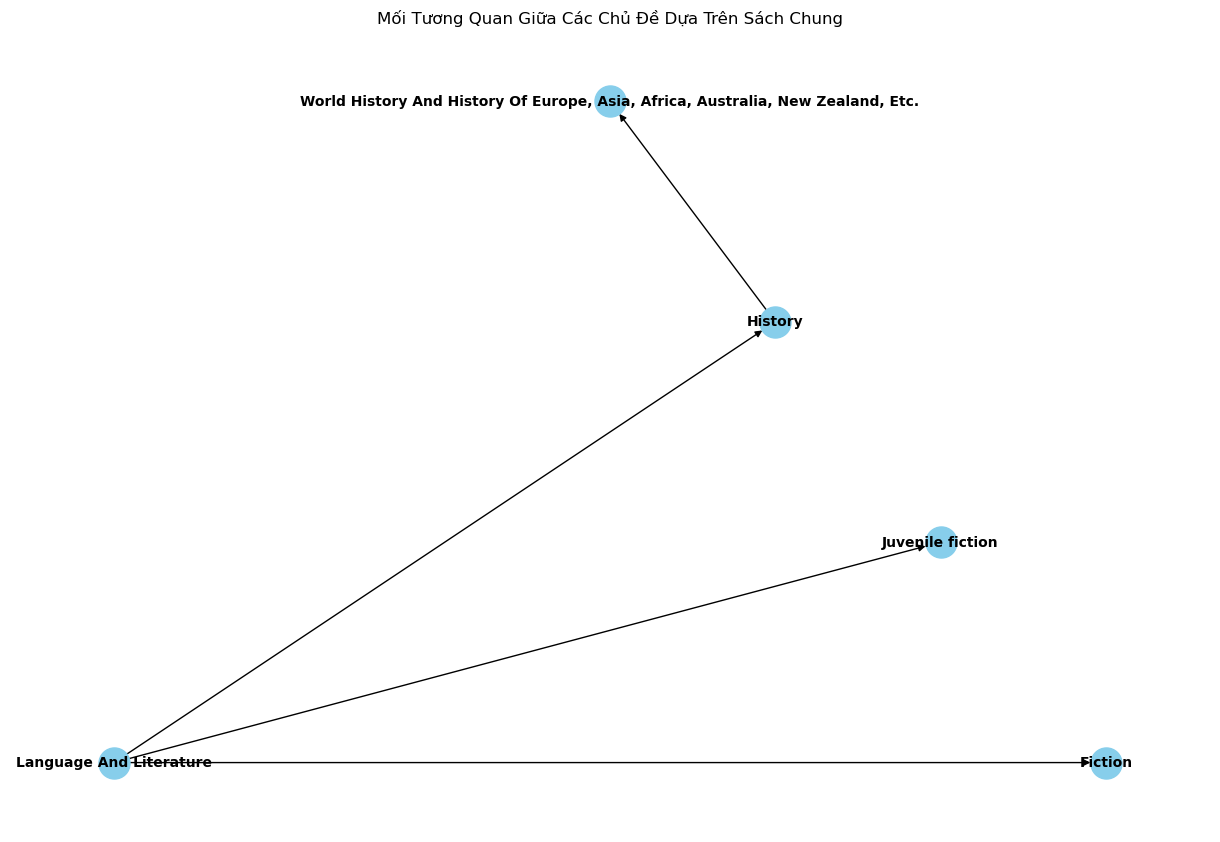

In [91]:
pos = nx.spring_layout(G, seed=42)  # Layout cho đồ thị
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges] # EdgeDataView([('Language And Literature', 'Fiction', {'weight': 14942}), ...])

plt.figure(figsize=(12, 8))
nx.draw_planar(G,
               with_labels=True, 
               font_weight='bold', 
               node_size=500, 
               node_color='skyblue', 
               font_size=10, 
               font_family="sans-serif",
               arrows=True, arrowstyle='-|>')

plt.title("Mối Tương Quan Giữa Các Chủ Đề Dựa Trên Sách Chung")
plt.show()

### Xếp hạng các số lượng các cuốn sách của mỗi tag

Để dễ dàng cho việc theo dõi và đưa ra cái nhìn ban đầu về từng tag, thực hiện trực quan top 20 tags có nhiều cuốn sách nhất

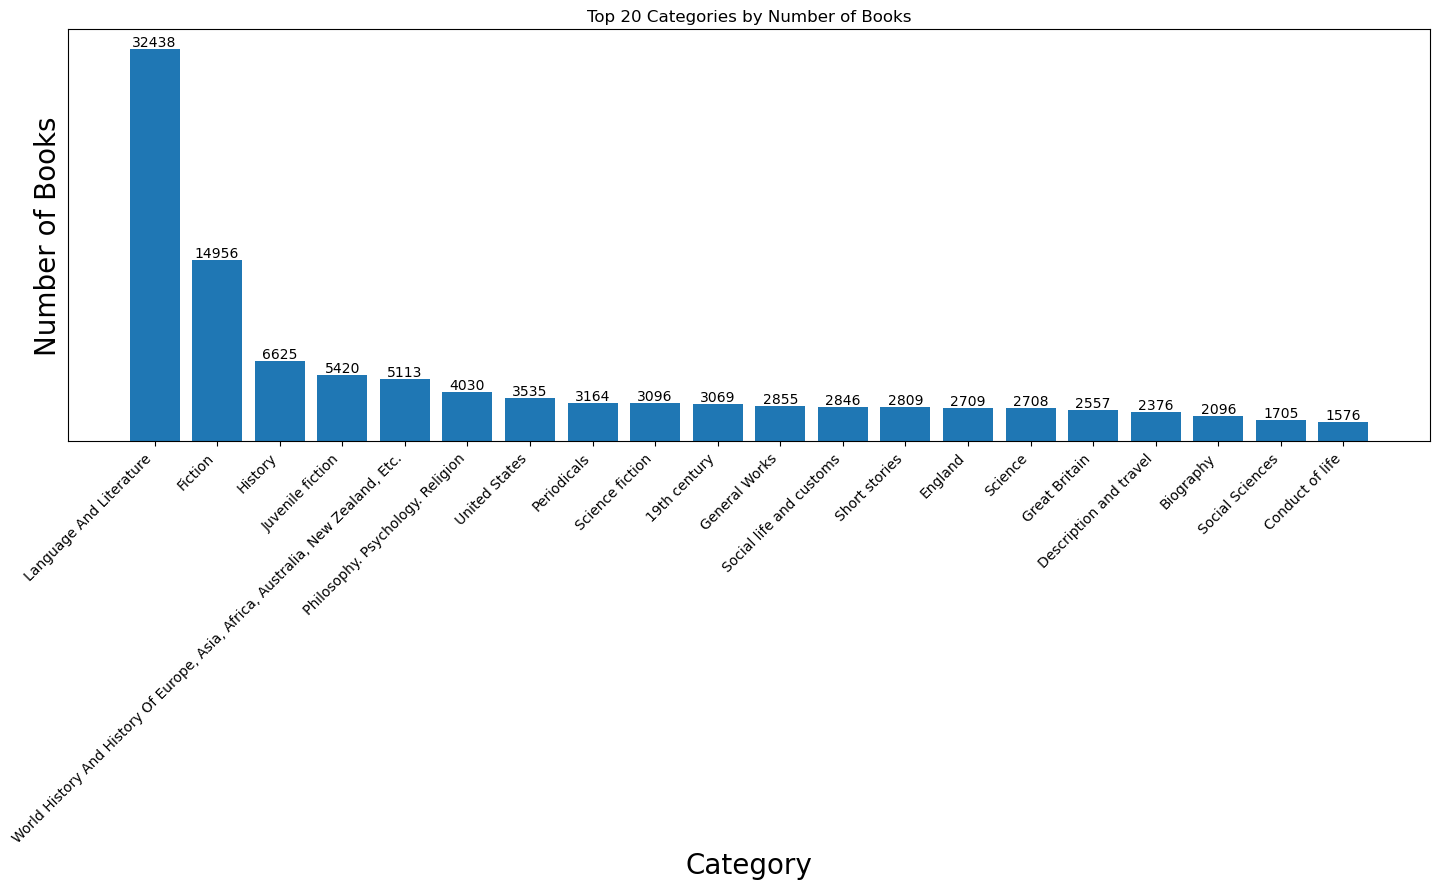

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))

top_20 = filtered_data.head(20)

plt.bar(range(len(top_20)), top_20['Book_Count'])

plt.xticks(range(len(top_20)), top_20['Key'], rotation=45, ha='right')
plt.yticks([])
plt.title('Top 20 Categories by Number of Books')
plt.xlabel('Category',size=20)
plt.ylabel('Number of Books',size=20)

for i, v in enumerate(top_20['Book_Count']):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()